In [1]:
import os, cv2, random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils
from keras import backend
backend.set_image_dim_ordering('th')

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
TRAIN_DIR = 'Folder/multitrain/'
TEST_DIR = 'Folder/test/

ROWS = 64
COLS = 64
CHANNELS = 3

train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 
#train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.DS_Store' not in i] # use this for full dataset

train_apples =    [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR+'Apple Red 3/') if 'apple' in i]
train_airplanes = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'airplane' in i]
train_bananas =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'banana' in i]
train_laptops =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'laptop' in i]
train_cats =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'cat' in i]
train_dogs =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_motorbikes =   [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if 'motorbike' in i]

test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)if '.DS_Store' not in i]


# slice datasets for memory efficiency on Kaggle Kernels, delete if using full dataset
train_images = train_apples[:400] + train_airplanes[:400] +train_bananas[:400] + train_laptops[:40] + train_motorbikes[:400]+ train_cats[:400] + train_dogs[:400]
random.shuffle(train_images)
test_images =  test_images[:15]


def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    #img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    #data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        if i%100 == 0: print('Processed {} of {}'.format(i, count))
    
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape: {}".format(test.shape))

SyntaxError: EOL while scanning string literal (<ipython-input-2-932ffe6d1cdc>, line 2)

In [3]:
labels = []
for i in train_images:
    if 'apple' in i:
        labels.append(1)
    elif 'airplane' in i:
        labels.append(2)
    elif 'banana' in i:
        labels.append(3)
    elif 'laptop' in i:
        labels.append(4)    
    
    elif 'cat' in i:
        labels.append(5) 
    elif 'dog' in i:
        labels.append(6)    
    else:
        labels.append(0)

sns.countplot(labels)
plt.title('Seven Category')

NameError: name 'train_images' is not defined

In [4]:
def show_apples_and_peaches(idx):
    apple = read_image(train_apples[idx])
    airplane = read_image(train_airplanes[idx])
    laptop = read_image(train_laptops[idx])
    banana = read_image(train_bananas[idx])
    
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    motorbike = read_image(train_motorbikes[idx])
    pair = np.concatenate((motorbike,apple, airplane, banana, laptop,  cat, dog), axis=1)
    plt.figure(figsize=(10,8))
    plt.imshow(pair)
    plt.show()
    
for idx in range(0,25):
    show_apples_and_peaches(idx)

NameError: name 'read_image' is not defined

In [5]:
apple_avg = np.array([apple[0].T for i, apple in enumerate(train) if labels[i]==1]).mean(axis=0)
plt.imshow(apple_avg)
plt.title(' Average Apple')

NameError: name 'train' is not defined

Text(0.5,1,' Average airplane')

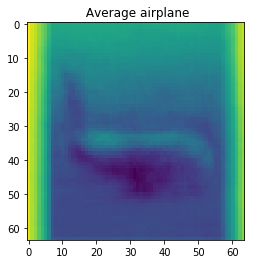

In [6]:
airplane_avg = np.array([airplane[0].T for i, airplane in enumerate(train) if labels[i]==2]).mean(axis=0)
plt.imshow(airplane_avg)
plt.title(' Average airplane')

Text(0.5,1,' Average Banana')

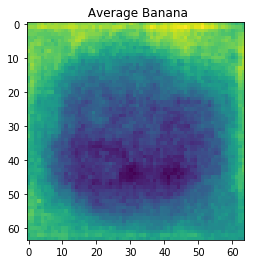

In [7]:
banana_avg = np.array([banana[0].T for i, banana in enumerate(train) if labels[i]==3]).mean(axis=0)
plt.imshow(banana_avg)
plt.title(' Average Banana')

Text(0.5,1,' Average Laptop')

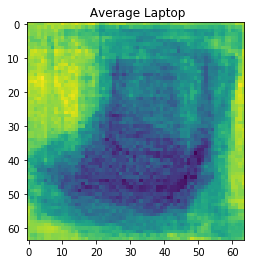

In [8]:
laptop_avg = np.array([laptop[0].T for i, laptop in enumerate(train) if labels[i]==4]).mean(axis=0)
plt.imshow(laptop_avg)
plt.title(' Average Laptop')

Text(0.5,1,' Average Cat')

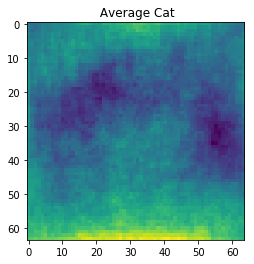

In [9]:
cat_avg = np.array([cat[0].T for i, cat in enumerate(train) if labels[i]==5]).mean(axis=0)
plt.imshow(cat_avg)
plt.title(' Average Cat')

Text(0.5,1,' Average Dog')

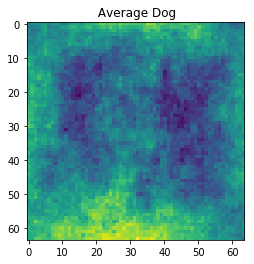

In [10]:
dog_avg = np.array([dog[0].T for i, dog in enumerate(train) if labels[i]==6]).mean(axis=0)
plt.imshow(dog_avg)
plt.title(' Average Dog')

Text(0.5,1,' Average motorbike')

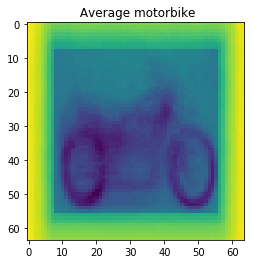

In [11]:
motorbike_avg = np.array([motorbike[0].T for i, motorbike in enumerate(train) if labels[i]==0]).mean(axis=0)
plt.imshow(motorbike_avg)
plt.title(' Average motorbike')

In [12]:
x_val=np.asarray(train[:10]) 
y_val=np.asarray(labels[:10])
print(x_val)
print(y_val)

[[[[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]

  [[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]

  [[255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   ...
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 255 255 ... 255 255 255]]]


 [[[254 255 254 ... 254 255 255]
   [255 255 255 ... 255 255 255]
   [255 252 191 ... 194 255 255]
   ...
   [246 246 190 ... 222 133 255]
   [255 254 255 ... 255 255 254]
   [255 255 255 ... 254 254 255]]

  [[254 255 254 ... 255 255 255]
   [255 255 255 ... 255 255 255]
   [255 252 191 ... 192 255 255]
   ...
   [253 255 205 ... 224 133 255]
   [255 253 255 ... 255 255 254

In [13]:
import keras.backend as K
optimizer = RMSprop(lr=1e-4)
objective = 'sparse_categorical_crossentropy'

def f2_score(y_true, y_pred):
    y_true = tf.cast(y_true, "int32")
    y_pred = tf.cast(tf.round(y_pred), "int32") # implicit 0.5 threshold via tf.round
    y_correct = y_true * y_pred
    sum_true = tf.reduce_sum(y_true, axis=1)
    sum_pred = tf.reduce_sum(y_pred, axis=1)
    sum_correct = tf.reduce_sum(y_correct, axis=1)
    precision = sum_correct / sum_pred
    recall = sum_correct / sum_true
    f_score = 5 * precision * recall / (4 * precision + recall)
    f_score = tf.where(tf.is_nan(f_score), tf.zeros_like(f_score), f_score)
    return tf.reduce_mean(f_score)

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

def applepeach():
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(3,ROWS, COLS), activation='relu'))
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))
    
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),data_format="channels_first"))

#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(8))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy', f1_score])
    return model


model = applepeach()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 64, 64)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 64, 64)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 32, 32)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 32, 32)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 16, 16)       73856     
__________

In [14]:
nb_epoch = 10
batch_size = 16

## Callback for loss logging per epoch
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.val_losses = []
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_f1s.append(logs.get('f1_score'))
        self.val_losses.append(logs.get('val_loss'))
        
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='auto')        
        
def run_applepeach():    
    history = LossHistory()
    model.fit(train, labels, batch_size=batch_size, epochs=nb_epoch,
              validation_split=0.25, verbose=0, shuffle=True, callbacks=[history, early_stopping],initial_epoch=0)
    predictions = model.predict(test, verbose=0)
    return predictions, history

predictions, history = run_applepeach()
print(predictions)
print(history)

[[1.38803644e-08 1.00000000e+00 3.73060084e-06 9.99999881e-01
  9.33467788e-07 2.36392808e-08 9.98168503e-07 3.29339195e-10]
 [1.69191917e-03 8.84222239e-02 3.07213329e-03 9.37641084e-01
  8.91009986e-04 5.65461695e-01 7.20034957e-01 1.76891569e-06]
 [7.19116315e-06 9.99947309e-01 3.52661940e-04 9.99972224e-01
  5.24841889e-05 7.28030282e-04 1.36213214e-03 4.45540735e-07]
 [1.00000000e+00 1.71340375e-09 1.80482175e-07 5.15040059e-11
  8.84011584e-08 2.01112698e-07 1.65592692e-10 6.86844733e-13]
 [4.92506340e-12 1.00000000e+00 2.33209605e-07 1.00000000e+00
  8.14874035e-09 7.85972065e-10 1.98842088e-07 1.16230051e-13]
 [1.09487770e-08 9.99999881e-01 2.28642512e-06 9.99999881e-01
  1.73317881e-06 9.81547828e-07 2.15836815e-04 5.46637269e-09]
 [2.11255440e-08 9.99999881e-01 3.98627753e-06 9.99999881e-01
  1.34140521e-06 2.89529556e-08 1.19335327e-05 2.84568613e-09]
 [2.27540550e-05 9.99860883e-01 3.28670940e-05 9.99994159e-01
  1.62814787e-04 1.36360910e-03 6.28883168e-02 2.15716022e-06]


In [15]:
score = model.evaluate(train, labels, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
print(score)

Test score: 0.7831532444347876
Test accuracy: 0.6478375994517334
[0.7831532444347876, 0.6478375994517334, 1.4410324803728607]


In [16]:
VOC_DIR = 'voc/'
voc_images =  [VOC_DIR+i for i in os.listdir(VOC_DIR)if '.DS_Store' not in i]

voc_images =  voc_images[:17]
testvoc = prep_data(voc_images)


Processed 0 of 17


In [17]:
predictions_voc = model.predict(testvoc, verbose=0)
print(predictions_voc)

[[4.31191288e-02 1.91126615e-02 3.46972421e-02 9.54221115e-02
  4.44533117e-03 8.58634055e-01 8.53187978e-01 2.53874488e-04]
 [2.37545650e-03 1.53640639e-02 2.36148145e-02 6.56411350e-02
  7.11011607e-03 9.73394394e-01 9.90777016e-01 4.71664061e-05]
 [4.08319803e-03 1.78553998e-01 4.88161705e-02 7.50308216e-01
  1.38152624e-02 6.86260402e-01 7.72192240e-01 9.93179274e-04]
 [7.72662740e-03 6.68726027e-01 1.01221919e-01 9.13826466e-01
  1.54460464e-02 1.60346374e-01 3.69696915e-01 1.03747891e-03]
 [1.62482429e-02 2.89456965e-03 9.74972639e-03 3.37030888e-02
  2.97309691e-03 9.75207150e-01 9.69868958e-01 8.39483982e-05]
 [3.58177200e-02 1.15481734e-01 2.97669023e-01 2.91836690e-02
  1.19699268e-02 2.08823651e-01 1.13723114e-01 2.14268221e-03]
 [6.00644231e-01 9.83865466e-03 1.00994088e-01 8.84799939e-03
  1.63613399e-03 1.81786671e-01 1.20906541e-02 5.42462338e-04]
 [3.45082544e-02 2.06977576e-01 2.87142731e-02 4.00399178e-01
  1.33873746e-02 8.82062614e-01 8.70215237e-01 3.25173233e-03]


In [18]:
pred_voc =[]
new_x=[]
for i in range(0,17):
    print("next image to test==========="+ str(i))
    print(predictions_voc[i])
    x=predictions_voc[i]
    index = [1,3,4]
    new_x = np.delete(x, index)
    print(new_x)
    #index_min = np.argmin(predictions[i])
    indv = np.argmax(new_x)
    pred_voc.append(indv)
    print(indv)
print(pred_voc)

next image to test===========0
[4.3119129e-02 1.9112661e-02 3.4697242e-02 9.5422111e-02 4.4453312e-03
 8.5863405e-01 8.5318798e-01 2.5387449e-04]
[4.3119129e-02 3.4697242e-02 8.5863405e-01 8.5318798e-01 2.5387449e-04]
2
next image to test===========1
[2.3754565e-03 1.5364064e-02 2.3614815e-02 6.5641135e-02 7.1101161e-03
 9.7339439e-01 9.9077702e-01 4.7166406e-05]
[2.3754565e-03 2.3614815e-02 9.7339439e-01 9.9077702e-01 4.7166406e-05]
3
next image to test===========2
[0.0040832  0.178554   0.04881617 0.7503082  0.01381526 0.6862604
 0.77219224 0.00099318]
[0.0040832  0.04881617 0.6862604  0.77219224 0.00099318]
3
next image to test===========3
[0.00772663 0.668726   0.10122192 0.91382647 0.01544605 0.16034637
 0.36969692 0.00103748]
[0.00772663 0.10122192 0.16034637 0.36969692 0.00103748]
3
next image to test===========4
[1.6248243e-02 2.8945697e-03 9.7497264e-03 3.3703089e-02 2.9730969e-03
 9.7520715e-01 9.6986896e-01 8.3948398e-05]
[1.6248243e-02 9.7497264e-03 9.7520715e-01 9.6986896e

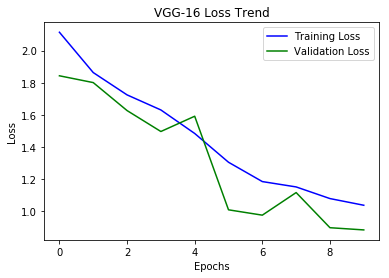

In [19]:
loss = history.losses
val_loss = history.val_losses

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG-16 Loss Trend')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(range(0,nb_epoch)[0::2])
plt.legend()
plt.show()

Cat
I am 0.03% sure


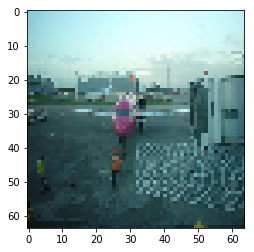

Mototrbike
I am 0.01% sure


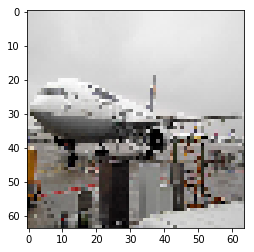

Dog
I am 10.74% sure


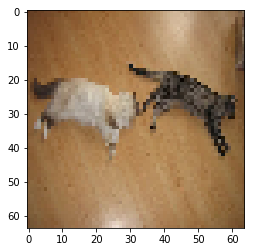

Dog
I am 3.80% sure


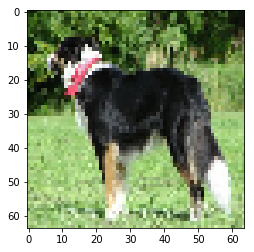

Dog
I am 0.61% sure


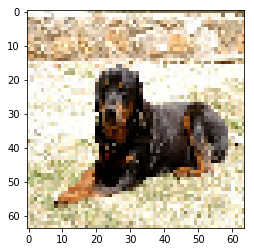

Dog
I am 0.00% sure


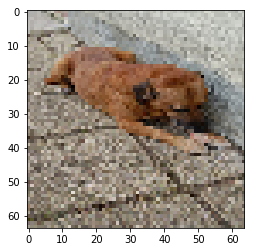

Airplane
I am 0.26% sure


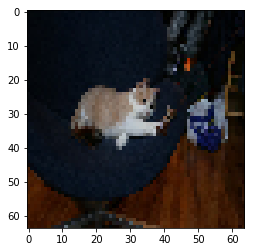

Cat
I am 89.78% sure


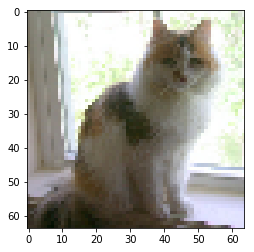

Airplane
I am 32.73% sure


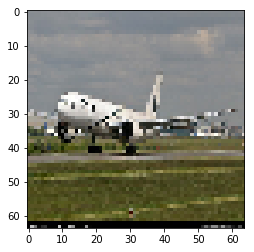

Airplane
I am 0.53% sure


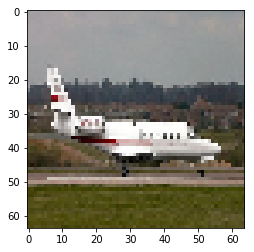

Dog
I am 1.84% sure


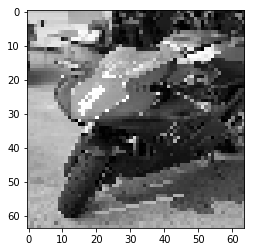

Airplane
I am 1.90% sure


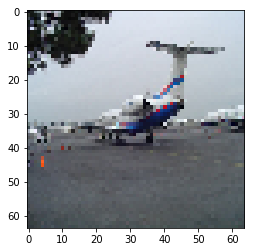

Airplane
I am 99.68% sure


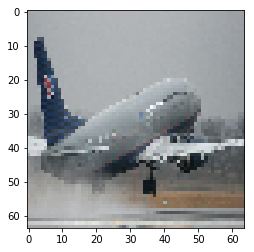

Dog
I am 0.00% sure


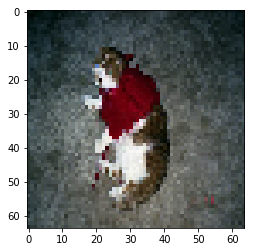

Dog
I am 99.93% sure


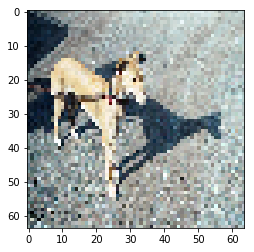

Dog
I am 80.03% sure


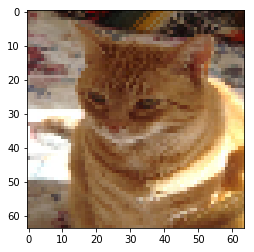

Dog
I am 99.98% sure


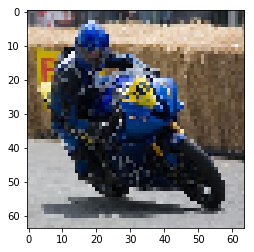

In [90]:
for i in range(0,17):
    
    ind = pred_voc[i]
    if ind ==0:
        print("Mototrbike")
    elif ind ==1:
        print("Airplane")
    elif ind ==2:
        print("Cat")
    elif ind ==3:
        print("Dog")           
    print("===============================")
    print('I am {:.2%} sure'.format(predictions[i][ind]))
      
        
    plt.imshow(testvoc[i].T)
    plt.show()
    plt.savefig('eightvoc.png')  

In [54]:
pred =[]
for i in range(0,65):
    print("next image to test==========="+ str(i))
    print(predictions[i])
    #index_min = np.argmin(predictions[i])
    ind = np.argmax(predictions[i])
    pred.append(ind)
    print(ind)

next image to test===========0
[  9.90153611e-01   1.30109838e-04   3.07380367e-04   3.42150997e-05
   2.40836325e-05   7.29015301e-05   3.63733197e-05   2.08054274e-07]
0
next image to test===========1
[  1.19862882e-04   1.20375655e-03   6.67912536e-05   2.42041700e-04
   1.75720590e-04   9.99754965e-01   9.94648635e-01   1.28778666e-07]
5
next image to test===========2
[ 0.14603303  0.10234198  0.053602    0.10744255  0.08224423  0.63762593
  0.54773724  0.00541336]
5
next image to test===========3
[ 0.05076294  0.01490725  0.04235993  0.03803648  0.02083776  0.69413698
  0.65821356  0.00073776]
5
next image to test===========4
[  1.09190859e-01   4.34783660e-03   1.26705980e-02   6.07061014e-03
   8.09228700e-03   7.64263809e-01   5.91126919e-01   2.70055287e-04]
5
next image to test===========5
[  2.39287186e-02   9.74900286e-06   9.90134776e-01   1.49598227e-05
   1.58663386e-06   4.70020177e-06   2.24041287e-06   4.21177830e-08]
2
next image to test===========6
[  1.18500946e-04

In [55]:
print(pred)

[0, 5, 5, 5, 5, 2, 6, 2, 3, 6, 6, 2, 3, 0, 3, 3, 3, 5, 3, 0, 3, 1, 3, 0, 1, 0, 0, 3, 0, 5, 0, 3, 1, 1, 6, 1, 6, 1, 3, 3, 5, 0, 5, 1, 2, 2, 3, 0, 0, 5, 5, 0, 1, 6, 1, 2, 2, 6, 6, 5, 2, 1, 0, 5, 2]


testing image============== 0
mototrbike
I am 99.02% sure


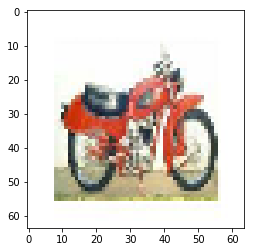

testing image============== 1
Cat
I am 99.98% sure


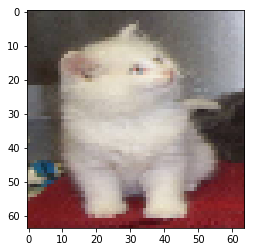

testing image============== 2
Cat
I am 63.76% sure


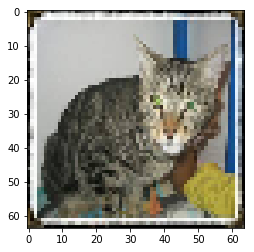

testing image============== 3
Cat
I am 69.41% sure


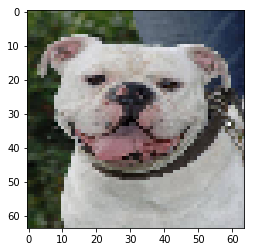

testing image============== 4
Cat
I am 76.43% sure


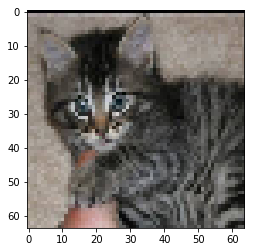

testing image============== 5
Airplane
I am 99.01% sure


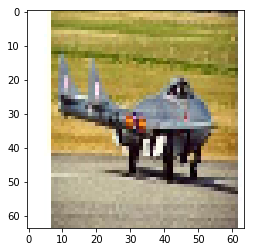

testing image============== 6
Dog
I am 99.86% sure


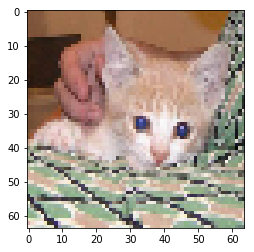

testing image============== 7
Airplane
I am 89.78% sure


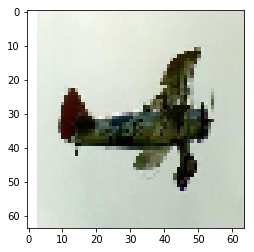

testing image============== 8
Banana
I am 57.57% sure


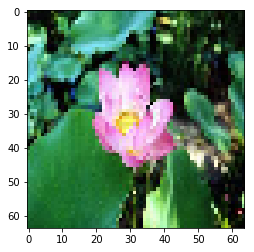

testing image============== 9
Dog
I am 86.19% sure


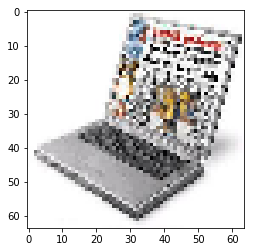

testing image============== 10
Dog
I am 93.72% sure


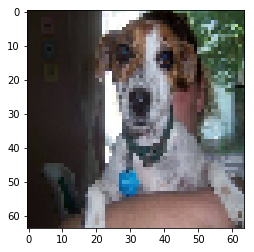

testing image============== 11
Airplane
I am 91.20% sure


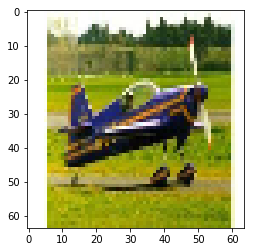

testing image============== 12
Banana
I am 99.75% sure


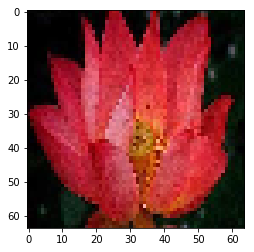

testing image============== 13
mototrbike
I am 100.00% sure


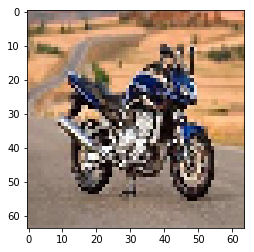

testing image============== 14
Banana
I am 99.93% sure


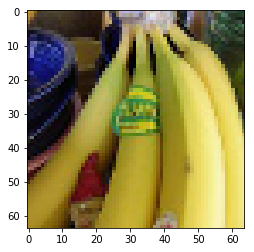

testing image============== 15
Banana
I am 80.03% sure


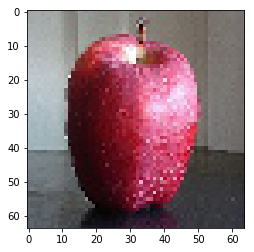

testing image============== 16
Banana
I am 99.98% sure


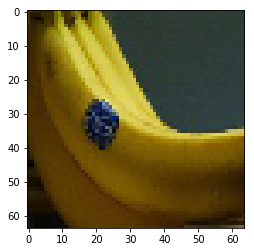

testing image============== 17
Cat
I am 94.32% sure


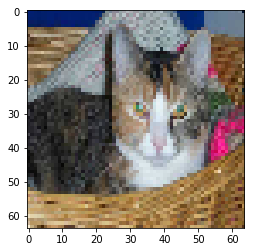

testing image============== 18
Banana
I am 99.71% sure


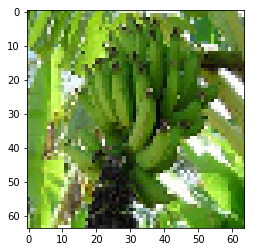

testing image============== 19
mototrbike
I am 100.00% sure


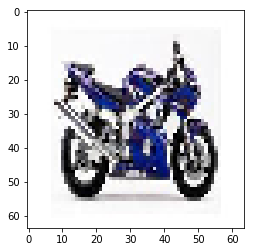

testing image============== 20
Banana
I am 100.00% sure


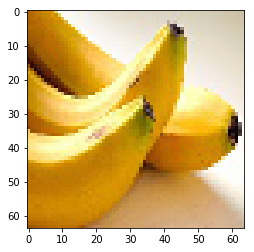

testing image============== 21
apple
I am 99.66% sure


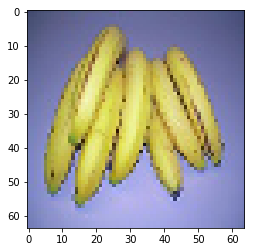

testing image============== 22
Banana
I am 51.71% sure


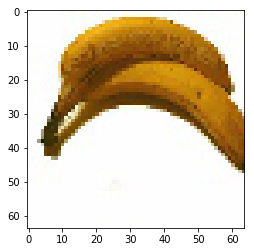

testing image============== 23
mototrbike
I am 100.00% sure


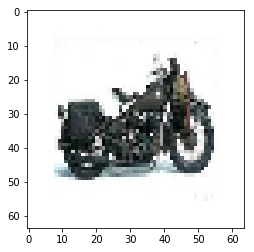

testing image============== 24
apple
I am 92.04% sure


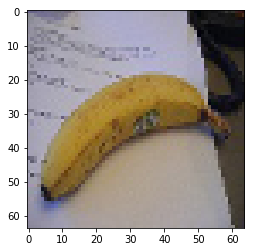

testing image============== 25
mototrbike
I am 99.97% sure


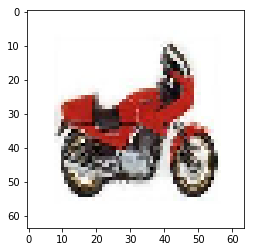

testing image============== 26
mototrbike
I am 99.99% sure


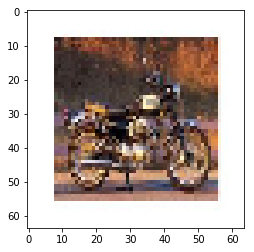

testing image============== 27
Banana
I am 99.93% sure


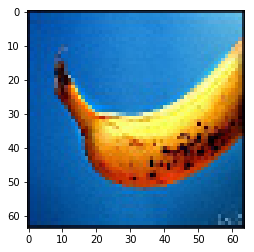

testing image============== 28
mototrbike
I am 99.98% sure


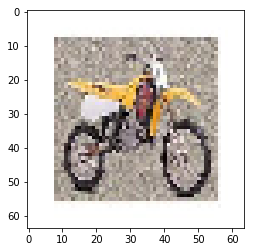

testing image============== 29
Cat
I am 99.87% sure


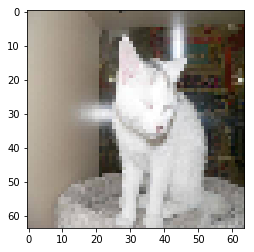

testing image============== 30
mototrbike
I am 99.99% sure


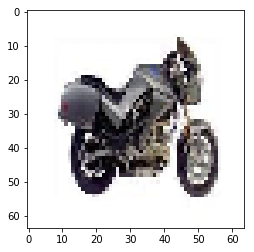

testing image============== 31
Banana
I am 99.98% sure


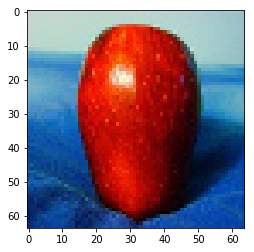

testing image============== 32
apple
I am 100.00% sure


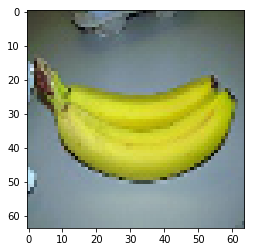

testing image============== 33
apple
I am 99.95% sure


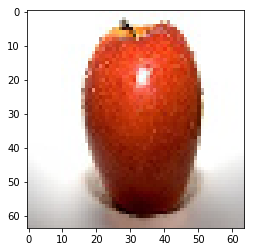

testing image============== 34
Dog
I am 96.62% sure


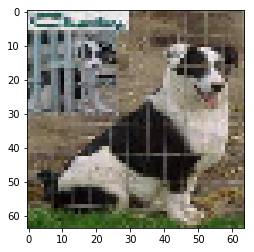

testing image============== 35
apple
I am 97.94% sure


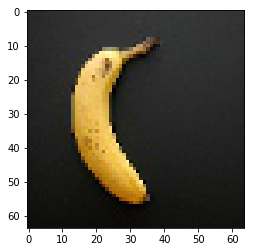

testing image============== 36
Dog
I am 45.09% sure


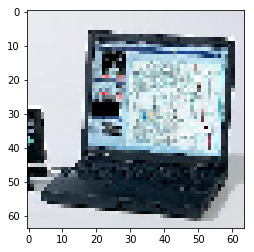

testing image============== 37
apple
I am 99.90% sure


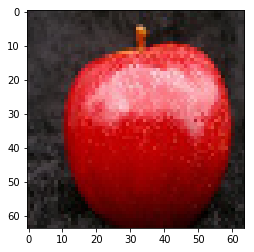

testing image============== 38
Banana
I am 98.51% sure


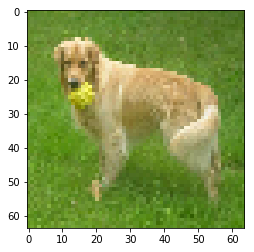

testing image============== 39
Banana
I am 97.75% sure


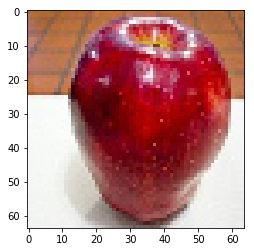

testing image============== 40
Cat
I am 99.97% sure


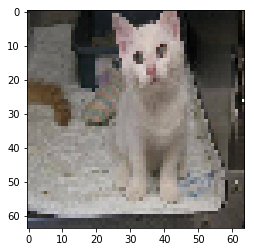

testing image============== 41
mototrbike
I am 99.99% sure


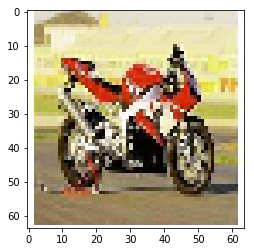

testing image============== 42
Cat
I am 99.88% sure


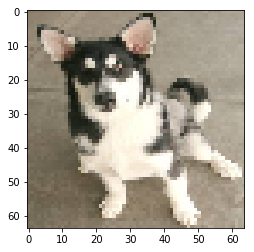

testing image============== 43
apple
I am 99.79% sure


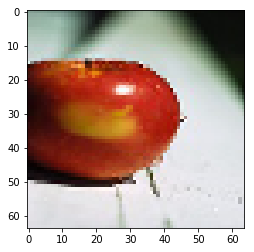

testing image============== 44
Airplane
I am 97.60% sure


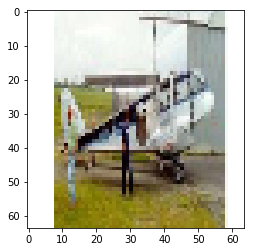

testing image============== 45
Airplane
I am 11.88% sure


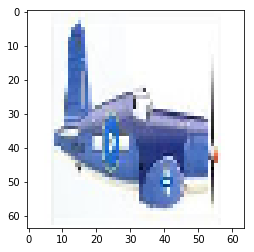

testing image============== 46
Banana
I am 99.98% sure


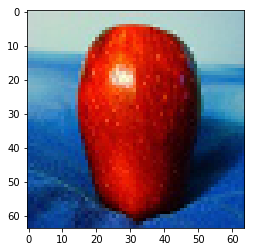

testing image============== 47
mototrbike
I am 99.99% sure


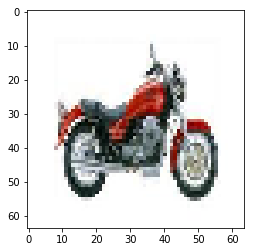

testing image============== 48
mototrbike
I am 100.00% sure


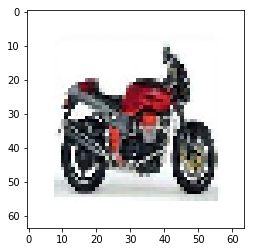

testing image============== 49
Cat
I am 99.47% sure


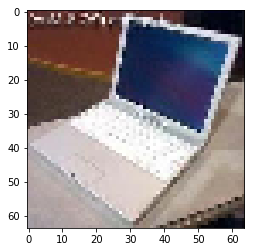

testing image============== 50
Cat
I am 99.53% sure


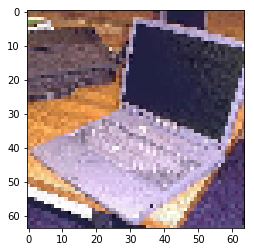

testing image============== 51
mototrbike
I am 100.00% sure


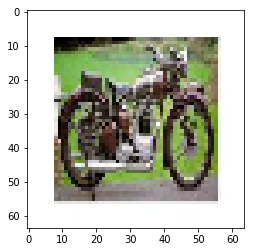

testing image============== 52
apple
I am 99.42% sure


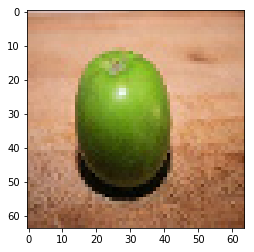

testing image============== 53
Dog
I am 99.88% sure


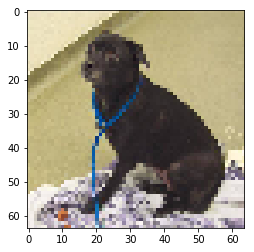

testing image============== 54
apple
I am 83.94% sure


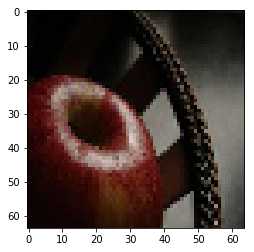

testing image============== 55
Airplane
I am 98.69% sure


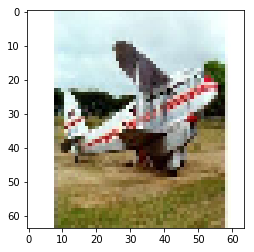

testing image============== 56
Airplane
I am 100.00% sure


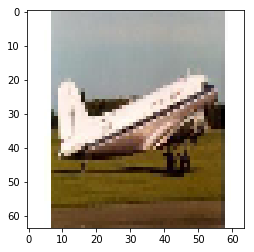

testing image============== 57
Dog
I am 58.13% sure


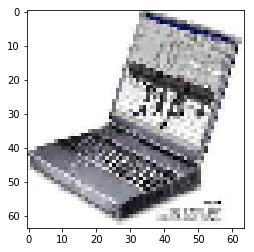

testing image============== 58
Dog
I am 96.76% sure


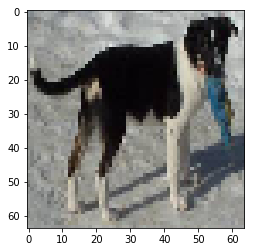

testing image============== 59
Cat
I am 84.85% sure


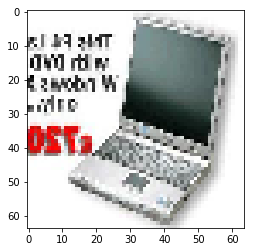

testing image============== 60
Airplane
I am 99.99% sure


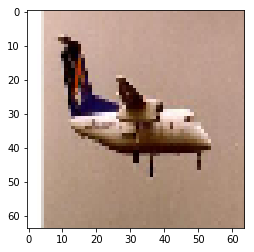

testing image============== 61
apple
I am 98.10% sure


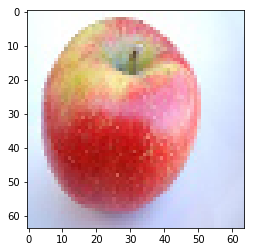

testing image============== 62
mototrbike
I am 99.99% sure


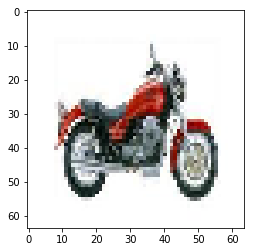

testing image============== 63
Cat
I am 99.95% sure


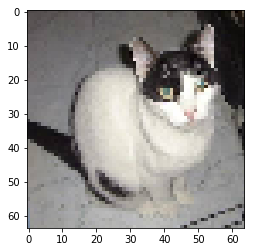

testing image============== 64
Airplane
I am 99.79% sure


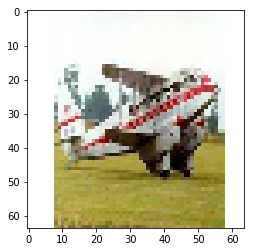

In [57]:
for i in range(0,65):
    print("testing image==============",i )
    ind = np.argmax(predictions[i])
    if ind ==0:
        print("mototrbike")
    elif ind ==1:
        print("apple")
    elif ind ==2:
        print("Airplane")
    elif ind ==3:
        print("Banana")
    elif ind ==4:
        print("Laptop")  
    elif ind ==5:
        print("Cat")
    
    elif ind ==6:
        print("Dog")  
      
    print("============================================================================")
    print('I am {:.2%} sure'.format(predictions[i][ind]))
      
        
    plt.imshow(test[i].T)
    plt.show()
    plt.savefig('eight.png')     

In [83]:
from sklearn.metrics import precision_recall_fscore_support as score
#prds=[3,0,3,0,3,7,3,0,3,3,7,3,3,6,6,2,6,3,2,6,3,3,1,1,1,1]
#tue= [1,0,3,0,3,4,3,0,3,3,3,3,3,7,6,2,7,3,6,6,3,5,1,1,1,1]
print(pred_voc)
voc_true=[2,0,3,3,3,3,2,2,1,1,3,1,1,3,3,2,0]
target_names = ['motorbike', 'airplane', 'cat', 'dog']
from sklearn.metrics import classification_report
print(classification_report(voc_true, pred_voc, target_names=target_names))

[2, 0, 3, 3, 3, 3, 1, 2, 1, 1, 3, 1, 1, 3, 3, 3, 3]
             precision    recall  f1-score   support

  motorbike       1.00      0.50      0.67         2
   airplane       0.80      1.00      0.89         4
        cat       1.00      0.50      0.67         4
        dog       0.78      1.00      0.88         7

avg / total       0.86      0.82      0.80        17



In [24]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 71.64%


In [25]:
print(model.metrics_names)

['loss', 'acc', 'f1_score']


In [26]:
print("%s: %.2f%%" % (model.metrics_names[2], score[2]*100))

f1_score: 158.33%


In [27]:
print('\nTest result: %.3f loss: %.3f f1_score: %.3f' % (score[1]*100,score[0], score[2]))


Test result: 71.639 loss: 0.709 f1_score: 1.583


In [58]:
from sklearn.metrics import precision_recall_fscore_support as score
#prds=[3,0,3,0,3,7,3,0,3,3,7,3,3,6,6,2,6,3,2,6,3,3,1,1,1,1]
#tue= [1,0,3,0,3,4,3,0,3,3,3,3,3,7,6,2,7,3,6,6,3,5,1,1,1,1]
y_true=[0,5,5,6,5,2,5,2,3,4,6,2,3,
 0,3,1,3,5,3,0,3,3,3,0,3,0,
 0, 3,0,5,0,1,3,1,6,3,4,1,6,1,
 5,0,6,1,2,2,1,0,0,4,4,0,1,
 6, 1,2,2,4,6,4,2,1,0,5,2
]
target_names = ['motorbike','apple', 'airplane', 'banana','laptop',  'cat', 'dog']
from sklearn.metrics import classification_report
print(classification_report(y_true, pred, target_names=target_names))

             precision    recall  f1-score   support

  motorbike       1.00      1.00      1.00        13
      apple       0.60      0.60      0.60        10
   airplane       1.00      1.00      1.00         9
     banana       0.62      0.67      0.64        12
     laptop       0.00      0.00      0.00         6
        cat       0.58      0.88      0.70         8
        dog       0.50      0.57      0.53         7

avg / total       0.67      0.72      0.69        65



/Users/mansurah/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [75]:
print(labels)

[2, 0, 7, 1, 2, 6, 7, 0, 0, 7, 0, 2, 6, 2, 2, 1, 2, 6, 7, 6, 4, 0, 6, 0, 3, 6, 7, 3, 6, 1, 3, 6, 6, 2, 0, 7, 6, 0, 7, 2, 2, 0, 0, 1, 2, 0, 1, 2, 2, 6, 0, 0, 2, 0, 7, 7, 6, 6, 6, 7, 2, 3, 2, 2, 3, 1, 7, 3, 7, 0, 7, 3, 3, 0, 7, 6, 7, 1, 7, 2, 2, 1, 1, 7, 3, 0, 0, 3, 4, 0, 6, 2, 3, 7, 3, 1, 3, 6, 6, 2, 2, 4, 7, 5, 3, 0, 0, 3, 3, 2, 6, 2, 6, 3, 4, 7, 1, 2, 6, 6, 0, 1, 3, 6, 3, 7, 1, 6, 7, 0, 0, 2, 6, 6, 2, 7, 1, 7, 7, 7, 6, 7, 2, 5, 6, 2, 0, 1, 7, 4, 1, 7, 0, 7, 0, 6, 3, 6, 7, 0, 2, 3, 3, 6, 0, 2, 3, 0, 2, 0, 7, 7, 2, 6, 2, 3, 6, 0, 6, 0, 0, 6, 1, 2, 6, 6, 3, 3, 0, 7, 0, 1, 6, 0, 6, 0, 7, 7, 6, 4, 2, 0, 3, 2, 0, 3, 4, 1, 2, 0, 7, 1, 3, 6, 6, 7, 2, 7, 3, 0, 1, 6, 6, 3, 6, 1, 3, 1, 0, 6, 2, 2, 2, 1, 7, 6, 7, 0, 2, 1, 2, 3, 7, 0, 1, 0, 5, 6, 6, 2, 2, 1, 2, 2, 3, 1, 2, 0, 3, 3, 7, 7, 2, 3, 7, 0, 2, 1, 1, 0, 6, 2, 6, 1, 1, 3, 2, 2, 1, 3, 7, 3, 7, 0, 0, 6, 5, 2, 6, 3, 4, 6, 7, 7, 1, 7, 0, 1, 0, 3, 6, 2, 7, 2, 2, 7, 4, 0, 1, 7, 7, 7, 3, 7, 0, 2, 7, 1, 3, 2, 7, 0, 1, 1, 2, 5, 0, 5, 1, 1, 7, 6, 3, 